# Logistic Regression
&nbsp;
## Cell 1
### 我们就....先准备好需要的计算函数吧!
&nbsp;

In [ ]:
# Cell 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def Sigmoid(z):
    return 1 / (1+np.exp(-z))


def Get_Prediction(feature_list, omega_list):
    prediction_list = [0 for i in range(len(feature_list))]
    for i in range(len(feature_list)):
        for j in range(len(feature_list[0])):
            prediction_list[i] += feature_list[i][j] * omega_list[j]
        prediction_list[i] = Sigmoid(prediction_list[i])

    return prediction_list


def Get_Loss(feature_list, truth_label_list, omega_list):
    prediction_list = Get_Prediction(feature_list, omega_list)
    loss = 0.0
    for i in range(len(feature_list)):
        loss -= (truth_label_list[i] * np.log(prediction_list[i]) + (1 - truth_label_list[i]) * np.log(1 - prediction_list[i]))
    return loss

&nbsp;
## Cell 2
### 从绝对路径读入需要的数据，
### 用print函数简单预览一下，
### 然后...按照真实标签，用两个list进行分装吧。
&nbsp;

In [ ]:
# Cell 2

source_data_abs_path = "E:/Python Program File/Binary_Classification_Data1.txt"
source_data = pd.read_csv(source_data_abs_path)

print(source_data)

sample_num = source_data.shape[0]
column_num = source_data.shape[1]

feature_list = (source_data.iloc[:, :column_num-1]).values.tolist()
truth_label_list = (source_data.iloc[:, column_num-1]).values.tolist()
positive_feature_list = []
negative_feature_list = []

for i in range(len(feature_list)):
    if (truth_label_list[i] == 1):
        positive_feature_list.append(feature_list[i]+[1.0])
    else:
        negative_feature_list.append(feature_list[i]+[1.0])

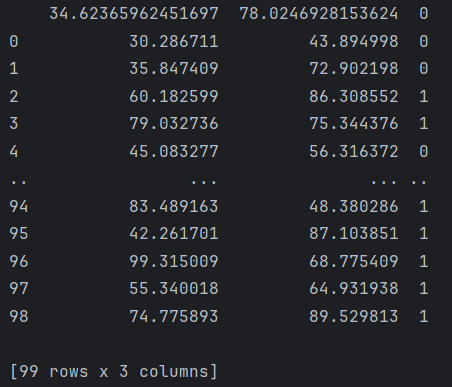

In [7]:
from IPython.display import Image 
Image("./fig1_4.png")

&nbsp;
## Cell 3
### 简单的可视化操作
### 没什么好说的咯
&nbsp;

In [ ]:
# Cell 3

figure = plt.figure()
subplot = figure.add_subplot()
positive_scatter = subplot.scatter([feature[0] for feature in positive_feature_list],
                                   [feature[1] for feature in positive_feature_list],
                                   marker='o',
                                   facecolor='red',
                                   edgecolor='red',
                                   s=15,
                                   label='Positive')

negative_scatter = subplot.scatter([feature[0] for feature in negative_feature_list],
                                   [feature[1] for feature in negative_feature_list],
                                   marker='^',
                                   facecolor='blue',
                                   edgecolor='blue',
                                   s=15,
                                   label='Negative')

subplot.set_title('Preview  of  Source  Data', fontsize=16)
subplot.set_xlabel('Feature 1', fontsize=14)
subplot.set_ylabel('Feature 2', fontsize=14)
subplot.legend(handles=[positive_scatter, negative_scatter], fontsize=12)
plt.show()

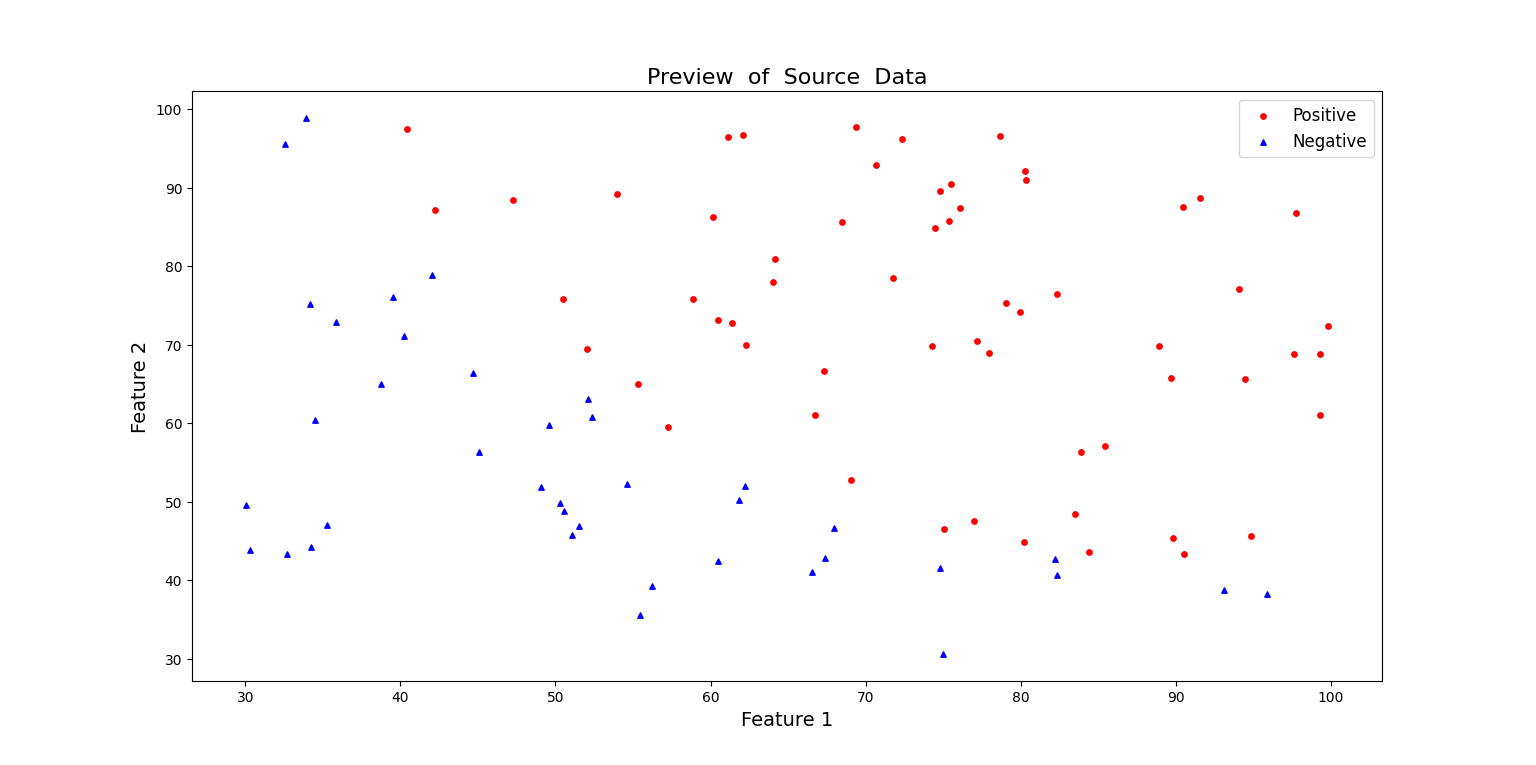

In [10]:
from IPython.display import Image 
Image("./fig2_4.png")

&nbsp;
## Cell 4
### 正样本数量 / 负样本数量 反映了数据集的结构，
### 划分 Train Set 和 Validation Set 的时候，
### 考虑尊重这个比值。
### （这里没有采取更统计学的划分方法。）
&nbsp;
### 这里的两个feature_list内部,
### 为什么是连续的正样本数值 拼接 连续的负样本数值?
### 只希望方便后续处理。
### 应该没有别的影响?
&nbsp;

In [ ]:
# Cell 4

ratio_p_to_n = len(positive_feature_list) / len(negative_feature_list)
train_set_size = 60
train_positive_sample_num = int((train_set_size) * (ratio_p_to_n) / (ratio_p_to_n+1))
train_negative_sample_num = train_set_size - train_positive_sample_num
val_set_size = sample_num -train_set_size
val_positive_sample_num = len(positive_feature_list) - train_positive_sample_num
val_negative_sample_num = val_set_size - val_positive_sample_num

train_feature_list = positive_feature_list[:train_positive_sample_num] + negative_feature_list[:train_negative_sample_num]
train_truth_label_list = [1 for i in range(train_positive_sample_num)] + [0 for i in range(train_negative_sample_num)]
val_feature_list = positive_feature_list[train_positive_sample_num:] + negative_feature_list[train_negative_sample_num:]
val_truth_label_list = [1 for i in range(val_positive_sample_num)] + [0 for i in range(val_negative_sample_num)]

&nbsp;
## Cell 5
### 正常的 batch gradient descent 思路，
### 不过要是把 learning rate 调大几个数量级，
### 就等着NaN吧。
&nbsp;

In [ ]:
# Cell 5

omega_list = [0.0, 0.0, 0.0]
loss_history_list = []
learning_rate = 0.000001

for i in range(100):
    loss = Get_Loss(train_feature_list, train_truth_label_list, omega_list)
    gradient_list = [3.0, 2.0, 5.0]
    prediction_list = Get_Prediction(train_feature_list, omega_list)
    for j in range(train_set_size):
        for k in range(len(omega_list)):
            gradient_list[k] += (prediction_list[j] - train_truth_label_list[j]) * train_feature_list[j][k]

    for j in range(len(omega_list)):
        omega_list[j] -= gradient_list[j] * learning_rate

    loss_history_list.append(loss)

&nbsp;
## Cell 6
### 简单的可视化操作，
### 看看刚刚的训练过程。
&nbsp;

In [ ]:
# Cell 6

loop_count_list = [i for i in range(100)]
figure = plt.figure()
subplot = figure.add_subplot()
subplot.plot(loop_count_list,
             loss_history_list,
             marker='o',
             markersize=4,
             markerfacecolor='red')

subplot.set_title('Loss-Loop Count  in  Training  Process', fontsize=16)
subplot.set_xlabel('loop count', fontsize=14)
subplot.set_ylabel('loss', fontsize=14)
plt.show()

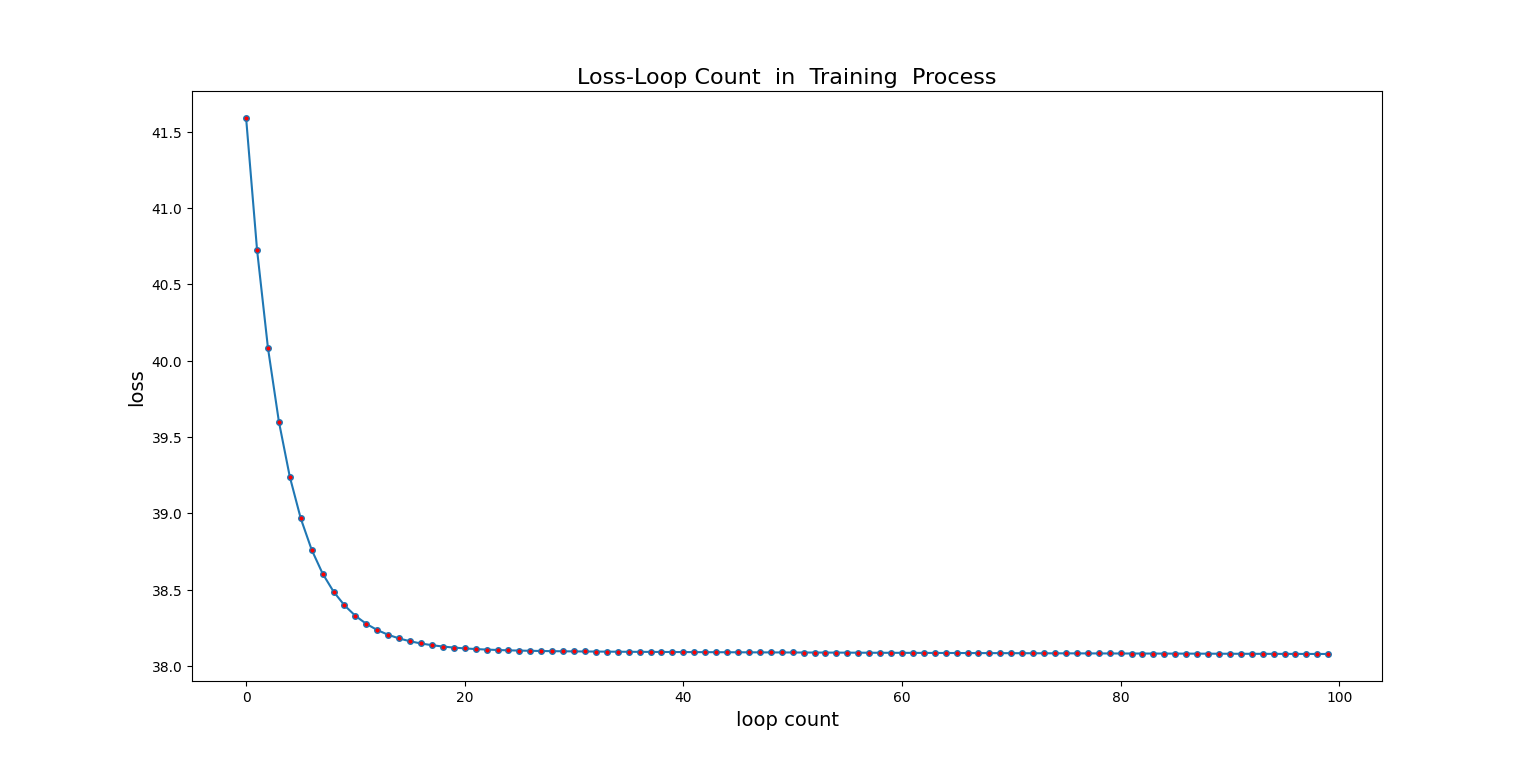

In [8]:
from IPython.display import Image 
Image("./fig3_4.png")

&nbsp;
## Cell 7
### 对 Validation Set 进行一轮预测,
### 好像应该继续迭代模型?
### 这里没有继续迭代模型，
### 最后的 ROC曲线 靠近左上角，
### AUC 也没有反常，
### 还是得到了一个可以接受的结果。
&nbsp;

In [ ]:
# Cell 7

prediction_list = Get_Prediction(val_feature_list, omega_list)
error = 0.0
print("In Validation Task:")
print("prediction         truth")
for i in range(val_set_size):
    print(str(prediction_list[i])+"  "+str(val_truth_label_list[i]))

fpr, tpr, thresholds = roc_curve(val_truth_label_list, prediction_list, drop_intermediate=False)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2,
         marker='o',
         markersize=5,
         label='ROC curve (AUC = %f)' % roc_auc)

plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=2,
         linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False  Positive  Rate',fontsize=14)
plt.ylabel('True  Positive  Rate', fontsize=14)
plt.title('Receiver  Operating  Characteristic', fontsize=16)
plt.legend(loc="lower right")
plt.show()

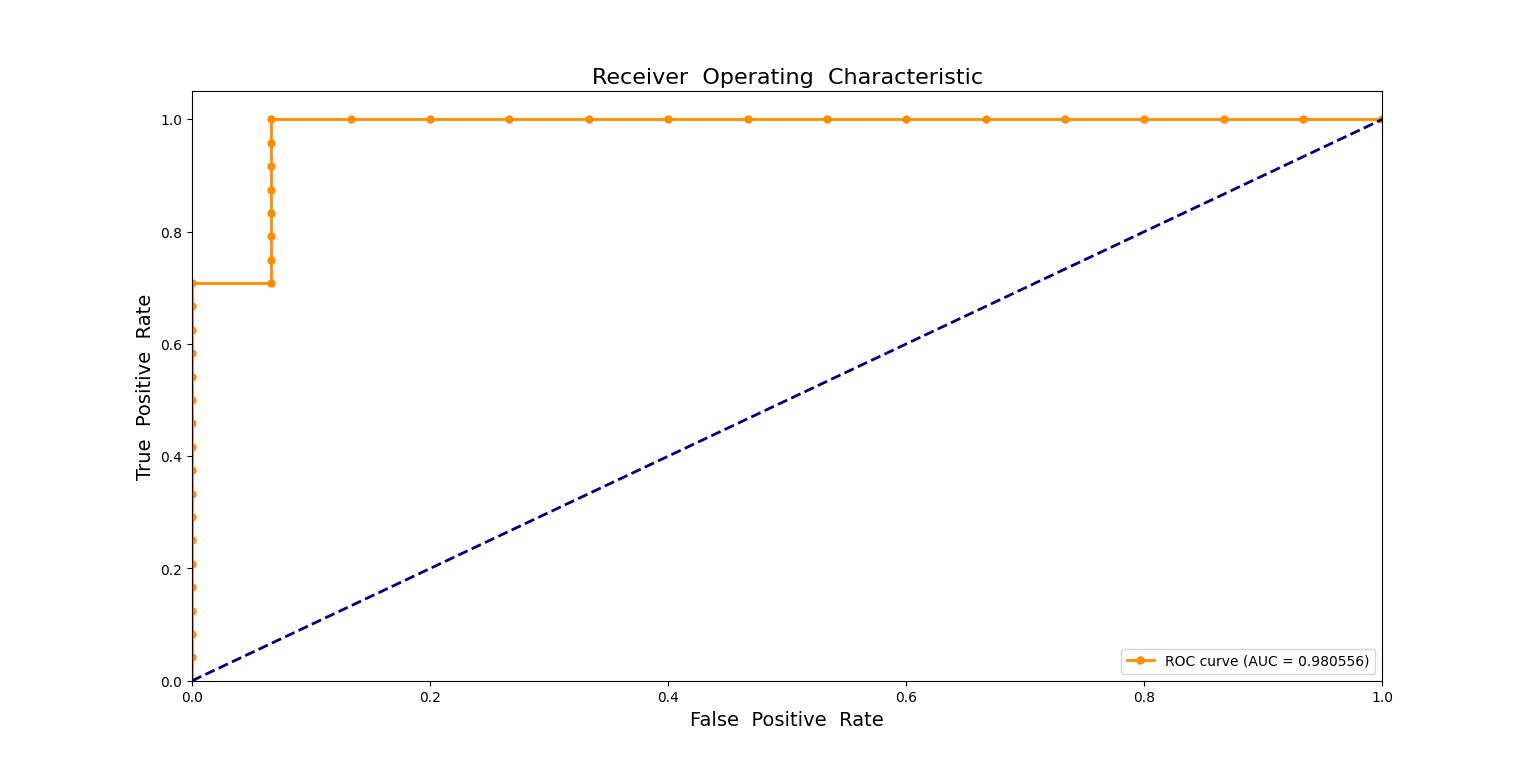

In [9]:
from IPython.display import Image 
Image("./fig4_4.png")

## 如果要在Validation Task结束后，
## 选择一个合适的 Threshold Value,
## 作为分类标准，
## 那就研究 ROC曲线 的顶点吧（或者说，这段折线的顶点）